In [2]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.


In [3]:
df_BANK_marketing=df['BANK_marketing131024']

In [4]:
df_BANK_marketing.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


In [6]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [7]:
df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,15.647157,372.542288,2.508816,51.326734,0.824909,0.473860
std,6754.310906,8.417469,345.261981,2.751196,109.031324,2.241574,0.499332
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,4041.500000,8.000000,139.000000,1.000000,-1.000000,0.000000,0.000000
50%,8082.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,17342.500000,22.000000,498.000000,3.000000,10.000000,1.000000,1.000000
max,21383.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [8]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16163 non-null  int64 
 1   contact   16163 non-null  object
 2   day       16163 non-null  int64 
 3   month     16163 non-null  object
 4   duration  16163 non-null  int64 
 5   campaign  16163 non-null  int64 
 6   pdays     16163 non-null  int64 
 7   previous  16163 non-null  int64 
 8   poutcome  16163 non-null  object
 9   deposit   16163 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 1.2+ MB


In [11]:
df_BANK_vista_marketing = df_BANK_vista_marketing.copy()

df_BANK_vista_marketing['contact'] = df_BANK_vista_marketing['contact'].astype('category')
df_BANK_vista_marketing['month'] = df_BANK_vista_marketing['month'].astype('category')
df_BANK_vista_marketing['poutcome'] = df_BANK_vista_marketing['poutcome'].astype('category')




In [12]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        16163 non-null  int64   
 1   contact   16163 non-null  category
 2   day       16163 non-null  int64   
 3   month     16163 non-null  category
 4   duration  16163 non-null  int64   
 5   campaign  16163 non-null  int64   
 6   pdays     16163 non-null  int64   
 7   previous  16163 non-null  int64   
 8   poutcome  16163 non-null  category
 9   deposit   16163 non-null  int64   
dtypes: category(3), int64(7)
memory usage: 932.1 KB


In [13]:
df_BANK_vista_marketing['previous_contact'] = df_BANK_vista_marketing['pdays'].apply(lambda x: 0 if x == -1 else 1)


# Agrupación por tipo de contacto:

Agrupa los datos por el tipo de contacto (móvil o telefónico) y calcula la tasa de conversión para cada uno de ellos.

In [14]:
conversion_rate = df_BANK_vista_marketing.groupby('contact')['deposit'].mean()
print(conversion_rate)


contact
cellular     0.542570
telephone    0.503923
unknown      0.227863
Name: deposit, dtype: float64


# Análisis estadístico

In [15]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_BANK_vista_marketing['contact'], df_BANK_vista_marketing['deposit'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 1046.6839002852457, p-value: 5.193724448879824e-228


    Chi2: 1046.68: Este valor del estadístico de chi-cuadrado es bastante alto. Un valor elevado indica que hay una gran discrepancia entre los valores observados y los esperados bajo la hipótesis nula (la hipótesis de que no hay asociación entre el tipo de contacto y la tasa de conversión).

    p-value: 5.19e-228: El valor p es extremadamente pequeño (prácticamente 0). Esto significa que hay una probabilidad muy baja de que las diferencias observadas entre los tipos de contacto (móvil o telefónico) sean debidas al azar.

Interpretación:

    Dado que el valor p es mucho menor que el umbral comúnmente aceptado de 0.05, rechazas la hipótesis nula. Esto implica que existe una relación significativa entre el tipo de contacto (móvil o telefónico) y la tasa de conversión de las campañas de marketing.

    En términos más simples, la manera en que se contacta a los clientes (ya sea móvil o telefónicamente) tiene un impacto notable en si hacen un depósito o no.

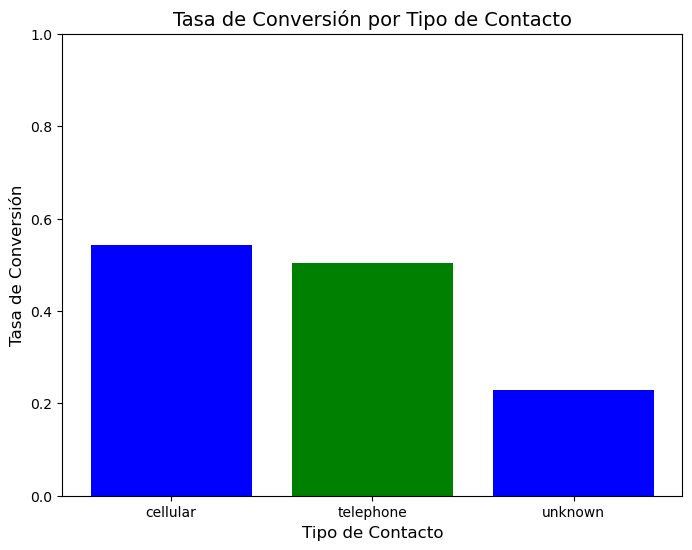

In [17]:
import matplotlib.pyplot as plt

# Calcular la tasa de conversión por tipo de contacto
conversion_rate = df_BANK_vista_marketing.groupby('contact')['deposit'].mean()

# Crear una gráfica de barras
plt.figure(figsize=(8,6))
plt.bar(conversion_rate.index, conversion_rate.values, color=['blue', 'green'])
plt.title('Tasa de Conversión por Tipo de Contacto', fontsize=14)
plt.xlabel('Tipo de Contacto', fontsize=12)
plt.ylabel('Tasa de Conversión', fontsize=12)
plt.ylim(0, 1)  # Limitar el eje y a 1 (100%)
plt.show()


## A partir de la gráfica que muestra la tasa de conversión por tipo de contacto, podemos extraer las siguientes conclusiones:

    Contacto por móvil ("cellular") tiene la tasa de conversión más alta: Esto indica que las campañas de marketing que utilizan el contacto a través de móviles son más efectivas, ya que logran que una mayor proporción de clientes realicen un depósito en comparación con otros tipos de contacto.

    Contacto telefónico ("telephone") también es efectivo, pero ligeramente inferior al móvil: La tasa de conversión para el contacto telefónico es menor que la del contacto móvil, lo que sugiere que este tipo de contacto es menos efectivo, aunque todavía tiene buenos resultados en comparación con otros métodos.


## Recomendaciones basadas en estos resultados:

    Priorizar el contacto móvil en las campañas futuras: Dado que el contacto por móvil tiene la mayor tasa de conversión, podrías redirigir una mayor parte del esfuerzo y los recursos de marketing hacia este canal.

    Optimizar el contacto telefónico: Aunque el contacto telefónico tiene una tasa de conversión más baja que el móvil, sigue siendo un canal relevante. Podrías mejorar la eficiencia de este canal ajustando los guiones de venta, capacitando mejor a los agentes o personalizando las campañas.

